In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly

# Modelling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

#SMOTE for Imbalance classes
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import classification_report,f1_score,precision_score,recall_score, auc, roc_curve

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

# Importing Data

In [87]:
df = pd.read_csv('Data/acme_bank_data_v2.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0,689,0,0,0,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0,1000,1000,1000,0,2000,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518,1500,1000,1000,1000,5000,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000,2019,1200,1100,1069,1000,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000,36681,10000,9000,689,679,0


In [88]:
pd.read_csv('Data/acme_bank_data_dictionnary.csv')

,Variable,Definition
0,ID,ID of each client
1,LIMIT_BAL,Amount of given credit in NT dollars (includes...
2,SEX,"Gender (1=male, 2=female)"
3,EDUCATION,"(1=graduate school, 2=university, 3=high schoo..."
4,MARRIAGE,"Marital status (1=married, 2=single, 3=others)"
5,AGE,Age in years
6,PAY_0,"Repayment status in September, 2005 (-1=pay du..."
7,PAY_2,"Repayment status in August, 2005 (scale same a..."
8,PAY_3,"Repayment status in July, 2005 (scale same as ..."
9,PAY_4,"Repayment status in June, 2005 (scale same as ..."


In [89]:
print("dimension of dataset", df.shape)

dimension of dataset (30000, 25)


### With total number of unique customer IDs being similar to total number of rows in data, this signifies that each row of data is unique to each specific customer

In [90]:
print("Total unique customer IDS:", len(df.ID.unique()))

Total unique customer IDS: 30000


In [91]:
total_na = df.isna().sum()
total_na[total_na>0]

LIMIT_BAL    128
BILL_AMT1     46
BILL_AMT2     12
BILL_AMT3     16
BILL_AMT4      4
BILL_AMT5      6
BILL_AMT6      4
dtype: int64

### Compared to the number of rows of data the NA Values seem small
### 1. Let's dive into Limit balance and BIll_amt and check if they are missing for any specific groups of cutomers or at random

In [92]:
df[df.LIMIT_BAL.isna()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
21,22,NaN,2,2,1,39,-1,-1,-1,-1,...,0.0,632.0,316.0,316,316,0,632,316,0,1
211,212,NaN,2,1,1,38,1,-2,-1,0,...,123.0,789.0,1222.0,0,250,0,789,1222,9616,1
649,650,NaN,2,2,2,46,8,7,6,5,...,19617.0,18737.0,18148.0,0,0,0,0,0,0,0
1085,1086,NaN,2,2,1,43,0,0,2,0,...,107561.0,105502.0,103813.0,9600,0,4000,3765,4000,4200,0
1161,1162,NaN,2,2,1,44,-2,-2,-2,-2,...,2683.0,1674.0,3273.0,1677,2920,2683,1674,3273,2749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28718,28719,NaN,2,1,1,45,-1,-1,-1,-1,...,291.0,291.0,291.0,291,291,291,291,291,291,0
29575,29576,NaN,1,2,2,38,2,0,0,0,...,56921.0,18050.0,18385.0,3000,3100,1409,631,1000,664,1
29594,29595,NaN,1,1,1,44,-1,-1,-1,-1,...,396.0,396.0,396.0,396,396,396,396,396,396,1
29613,29614,NaN,1,1,1,39,0,0,0,0,...,194782.0,191172.0,193267.0,7004,10061,7071,6514,7081,10121,0


In [93]:
df[df.BILL_AMT2.isna()][['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
1092,NaN,NaN,199393.0,194538.0,195990.0,194136.0
6111,NaN,NaN,115581.0,118481.0,116444.0,117283.0
7277,NaN,NaN,0.0,10195.0,24232.0,22000.0
7876,NaN,NaN,26700.0,27064.0,27685.0,27091.0
10323,9958.0,NaN,11653.0,11762.0,12418.0,NaN
10764,NaN,NaN,52028.0,32140.0,32216.0,31482.0
10895,NaN,NaN,490093.0,435019.0,329476.0,338557.0
10976,390.0,NaN,390.0,390.0,390.0,390.0
10983,50456.0,NaN,0.0,0.0,0.0,0.0
11313,NaN,NaN,0.0,2072.0,-28.0,-28.0


### Dropping All the rows which have any type of bill amount missing and no limit data makes up in losing 185 customers data compared to total 30000 customers


### These bill amounts can't be fixed by filling in mean, median or even ffill or b value from the column, as the bill amount is different for different customer.
### row wise mean of BIll amount1-6 could be used but inital analysis of na values for each bill amount showed that bill values are are also too variable month wise and using mean value would cause bias


In [94]:
filter_condition = (df.BILL_AMT1.notna()) & (df.BILL_AMT2.notna()) & (df.BILL_AMT3.notna()) &\
                    (df.BILL_AMT4.notna()) & (df.BILL_AMT5.notna()) & (df.BILL_AMT6.notna()) &\
                        (df.LIMIT_BAL.notna())

In [95]:
df[filter_condition].reset_index(drop=True)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0,689,0,0,0,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0,1000,1000,1000,0,2000,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518,1500,1000,1000,1000,5000,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000,2019,1200,1100,1069,1000,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29810,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500,20000,5003,3047,5000,1000,0
29811,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837,3526,8998,129,0,0,0
29812,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0,0,22000,4200,2000,3100,1
29813,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900,3409,1178,1926,52964,1804,1


In [96]:
df_no_null = df[filter_condition].reset_index(drop=True)

## Treating outliers

### First let's plot on average how many people in the dataset have defaulted to see if high values show similar trend or not.

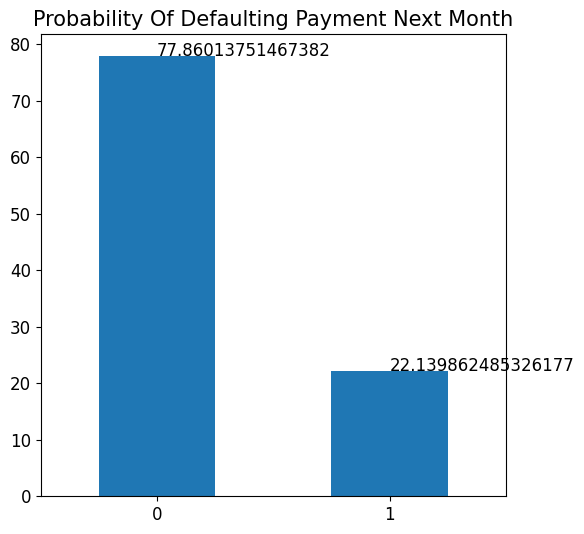

In [72]:
def_cnt = (df_no_null['default payment next month'].value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [57]:
df_no_null.apply(var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
ID,29815.0,0.0,4.477666e+08,15018.16,15031.0,8657.05,7.494444e+07,1.0,306.14,1507.7,3023.4,7522.5,15031.0,22509.5,27009.6,28502.3,29700.86,30000.0
LIMIT_BAL,29815.0,0.0,4.992230e+09,167440.20,140000.0,129710.27,1.682475e+10,10000.0,10000.00,20000.0,30000.0,50000.0,140000.0,240000.0,360000.0,430000.0,500000.00,1000000.0
SEX,29815.0,0.0,4.780800e+04,1.60,2.0,0.49,2.400000e-01,1.0,1.00,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.00,2.0
EDUCATION,29815.0,0.0,5.525500e+04,1.85,2.0,0.79,6.200000e-01,0.0,1.00,1.0,1.0,1.0,2.0,2.0,3.0,3.0,5.00,6.0
MARRIAGE,29815.0,0.0,4.628000e+04,1.55,2.0,0.52,2.700000e-01,0.0,1.00,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.00,3.0
AGE,29815.0,0.0,1.058013e+06,35.49,34.0,9.22,8.506000e+01,21.0,22.00,23.0,25.0,28.0,34.0,41.0,49.0,53.0,60.00,79.0
PAY_0,29815.0,0.0,-4.710000e+02,-0.02,0.0,1.12,1.260000e+00,-2.0,-2.00,-2.0,-1.0,-1.0,0.0,0.0,2.0,2.0,3.00,8.0
PAY_2,29815.0,0.0,-3.997000e+03,-0.13,0.0,1.20,1.430000e+00,-2.0,-2.00,-2.0,-2.0,-1.0,0.0,0.0,2.0,2.0,3.00,8.0
PAY_3,29815.0,0.0,-4.949000e+03,-0.17,0.0,1.20,1.430000e+00,-2.0,-2.00,-2.0,-2.0,-1.0,0.0,0.0,2.0,2.0,3.00,8.0
PAY_4,29815.0,0.0,-6.569000e+03,-0.22,0.0,1.17,1.370000e+00,-2.0,-2.00,-2.0,-2.0,-1.0,0.0,0.0,2.0,2.0,3.00,8.0


#### LIMIT AMT 100th percentile is 2x of 99th percentile is clearly an outlier and will introduce bias in the model, especially non tree based classification based models
### BILL AMT 0th percentile for all the 6 bill amts are certainly high

In [70]:
df_no_null[(df_no_null.BILL_AMT1>df_no_null.BILL_AMT1.quantile(0.995))]['default payment next month'].value_counts()

0    106
1     44
Name: default payment next month, dtype: int64

### Around 29% customers with very high Balance limit do default their payment and follow similar trend as the whole of the data

In [69]:
df_no_null[(df_no_null.BILL_AMT1<df_no_null.BILL_AMT1.quantile(0.01))]['default payment next month'].value_counts()

0    246
1     51
Name: default payment next month, dtype: int64

### And similiar trend can be seen in very low bill amount customers

In [64]:
df_no_null[(df_no_null.LIMIT_BAL<df_no_null.LIMIT_BAL.quantile(0.995)) & 
                (df_no_null.BILL_AMT1>df_no_null.BILL_AMT1.quantile(0.01))].apply(var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
ID,29364.0,0.0,4.410039e+08,15018.52,15030.5,8647.23,7.477456e+07,1.0,310.63,1515.15,3033.3,7542.75,15030.5,22488.25,27000.7,28496.85,29696.37,30000.0
LIMIT_BAL,29364.0,0.0,4.837080e+09,164728.23,140000.0,125672.46,1.579357e+10,10000.0,10000.00,20000.00,30000.0,50000.00,140000.0,240000.00,360000.0,420000.00,500000.00,530000.0
SEX,29364.0,0.0,4.709900e+04,1.60,2.0,0.49,2.400000e-01,1.0,1.00,1.00,1.0,1.00,2.0,2.00,2.0,2.00,2.00,2.0
EDUCATION,29364.0,0.0,5.448300e+04,1.86,2.0,0.79,6.200000e-01,0.0,1.00,1.00,1.0,1.00,2.0,2.00,3.0,3.00,5.00,6.0
MARRIAGE,29364.0,0.0,4.558400e+04,1.55,2.0,0.52,2.700000e-01,0.0,1.00,1.00,1.0,1.00,2.0,2.00,2.0,2.00,3.00,3.0
AGE,29364.0,0.0,1.041103e+06,35.46,34.0,9.22,8.507000e+01,21.0,22.00,23.00,25.0,28.00,34.0,41.00,49.0,53.00,60.00,79.0
PAY_0,29364.0,0.0,-4.360000e+02,-0.01,0.0,1.12,1.260000e+00,-2.0,-2.00,-2.00,-1.0,-1.00,0.0,0.00,2.0,2.00,3.00,8.0
PAY_2,29364.0,0.0,-3.444000e+03,-0.12,0.0,1.19,1.420000e+00,-2.0,-2.00,-2.00,-2.0,-1.00,0.0,0.00,2.0,2.00,3.00,8.0
PAY_3,29364.0,0.0,-4.541000e+03,-0.15,0.0,1.19,1.420000e+00,-2.0,-2.00,-2.00,-2.0,-1.00,0.0,0.00,2.0,2.00,3.00,8.0
PAY_4,29364.0,0.0,-6.196000e+03,-0.21,0.0,1.17,1.360000e+00,-2.0,-2.00,-2.00,-2.0,-1.00,0.0,0.00,2.0,2.00,3.00,8.0


### Looking for outliers in education feautre

In [21]:
print("{0} belong to Education class 0".format(len(df.loc[ df["EDUCATION"]==0])))
print("{0} belong to Education class 1".format(len(df.loc[ df["EDUCATION"]==1])))
print(" {0} belong to Education class 2".format(len(df.loc[ df["EDUCATION"]==2])))
print(" {0} belong to Education class 3".format(len(df.loc[ df["EDUCATION"]==3])))
print(" {0} belong to Education class 4".format(len(df.loc[ df["EDUCATION"]==4])))
print(" {0} belong to Education class 5".format(len(df.loc[ df["EDUCATION"]==5])))
print(" {0} belong to Education class 6".format(len(df.loc[ df["EDUCATION"]==6])))

14 belong to Education class 0
10585 belong to Education class 1
 14030 belong to Education class 2
 4917 belong to Education class 3
 123 belong to Education class 4
 280 belong to Education class 5
 51 belong to Education class 6


In [30]:
# Education classes 0, 4,5,6 don't have many value as compared to other classes and ceertainly are outliers in the data 
def education_filter(x):
    if x<1:
        return 1
    elif x>4:
        return 4
    else:
        return x
        
df_no_null["EDUCATION"] = df_no_null["EDUCATION"].apply( lambda x: education_filter(x))



In [31]:
df_no_null["EDUCATION"].value_counts()

2    13948
1    10528
3     4889
4      450
Name: EDUCATION, dtype: int64

##### I WIll be moving ahead with not treating the outliers in the data

In [32]:
df_no_null.to_csv('Data/cleaned.csv')

# Working on new data

In [5]:
df = pd.read_csv('Data/cleaned.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0,689,0,0,0,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0,1000,1000,1000,0,2000,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518,1500,1000,1000,1000,5000,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000,2019,1200,1100,1069,1000,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000,36681,10000,9000,689,679,0


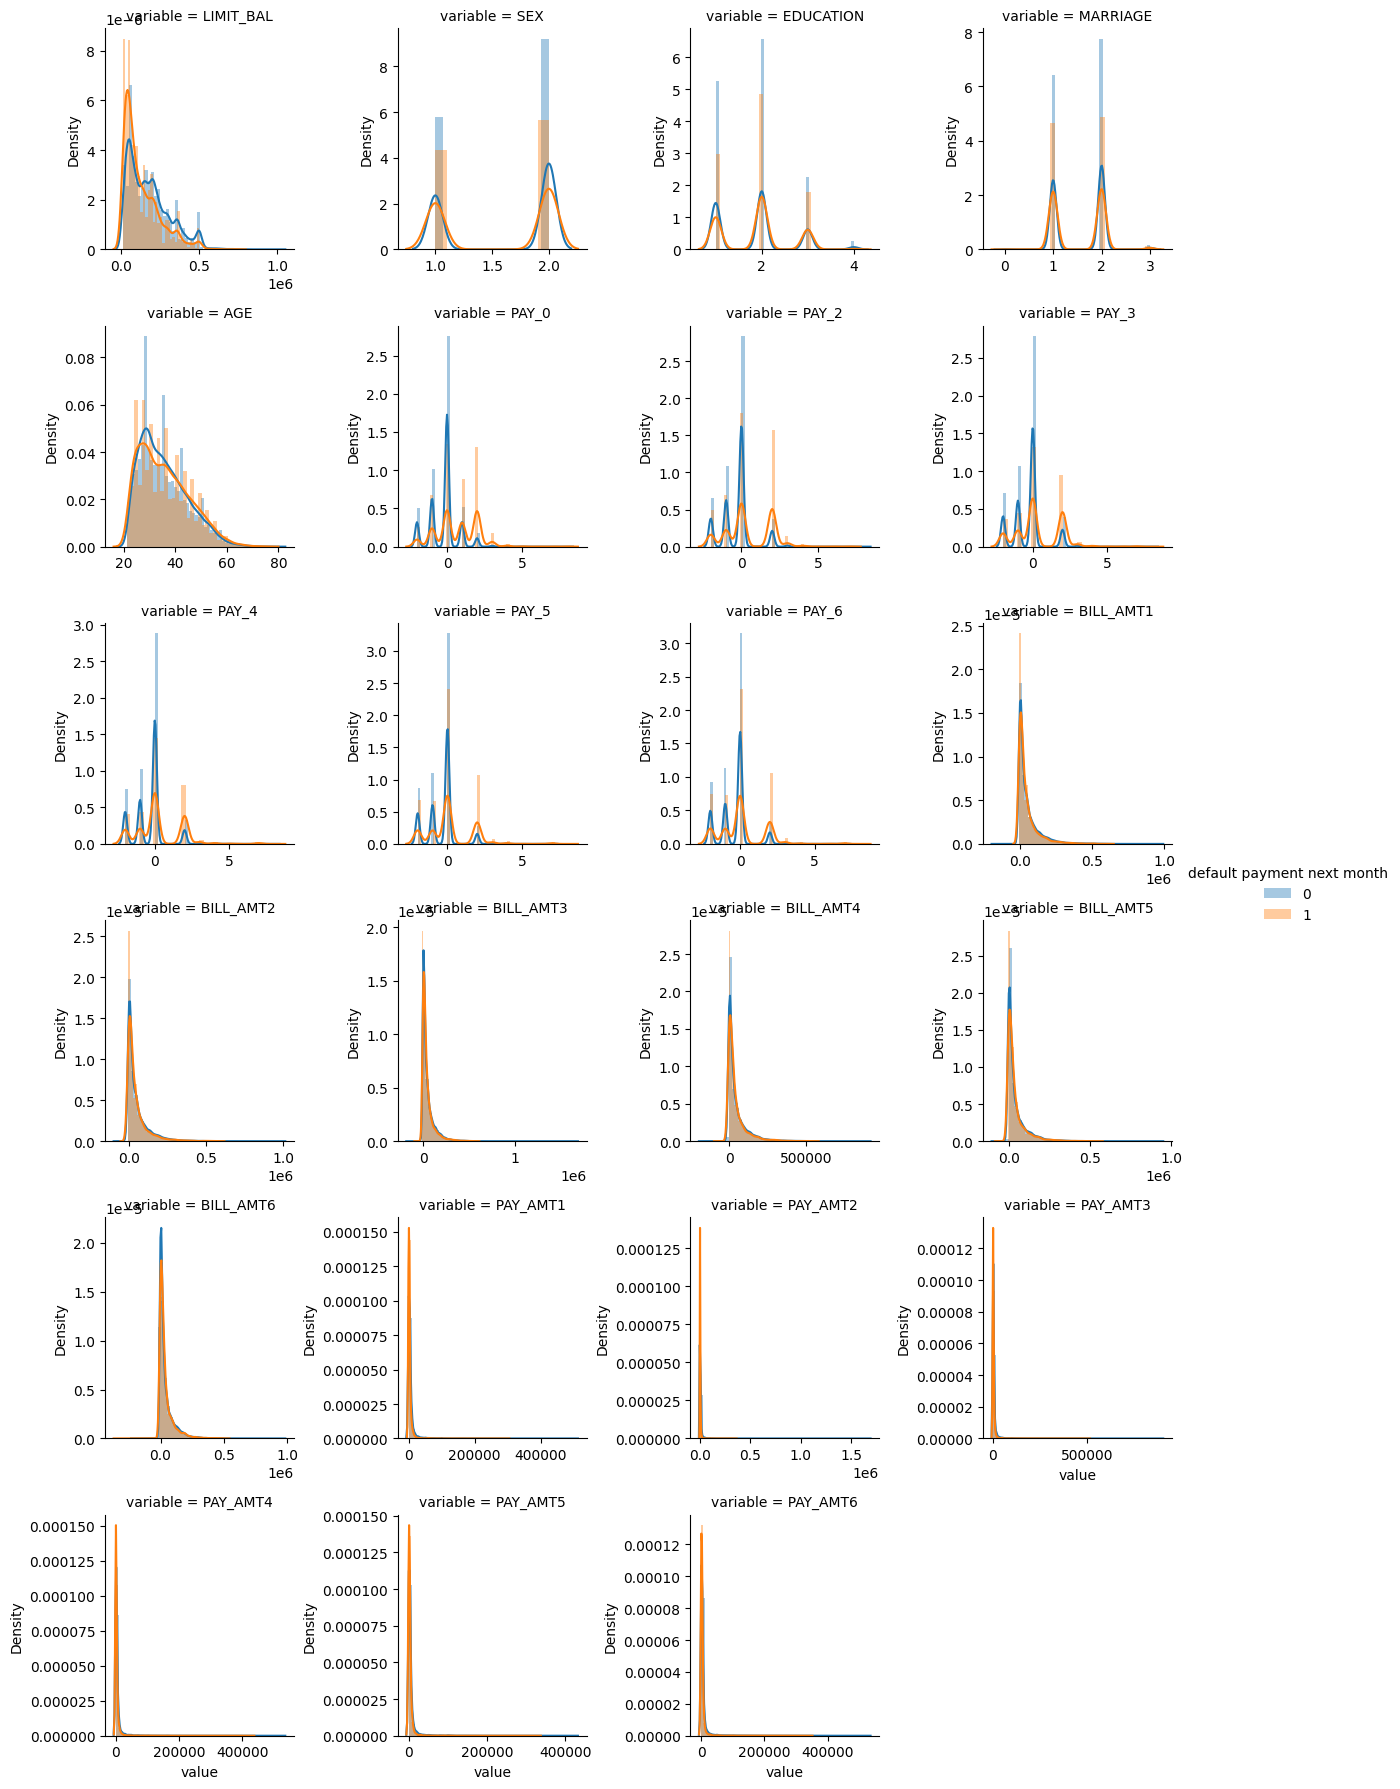

In [7]:
output = 'default payment next month'
cols = [ f for f in df.columns if df.dtypes[ f ] != "object"]
cols.remove( "ID")
cols.remove(output)

f = pd.melt( df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=4, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

##### Observations:

##### Defaults have a higher proportion of Lower LIMIT_BAL values
##### NonDefaults have a higher proportion of Females (Sex=2)
##### NonDefaults have a higher proportion of MoreEducated (EDUCATION=1 or 2)
##### NonDefaults have a higher proportion of Singles (MARRIAGE=2)
##### NonDefaults have a higher proportion of people 30-40years
##### NonDefaults have a MUCH higher proportion of zero or negative PAY_X variables (this means that being current or ahead of payments is associated with not defaulting in the following month). This is a strong relationship as the distribution are more separated - so we expect the PAY_X to be important!

### Just evaluating the payment default probability shows that 78% people won't default but this analysis can't be used for real life default prediction, it's as good as a toss of coin and won't help us in analyzing which customer will deafult or not.


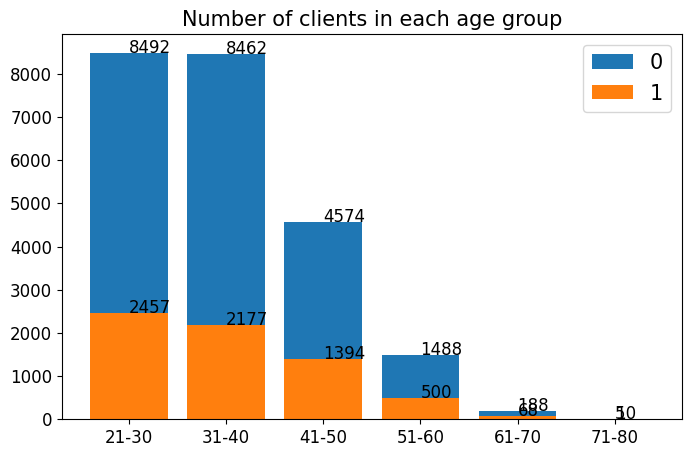

In [8]:
# Creating bins for age
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

# Extracting count of ages for defaults and non defaults payments
age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[f['default payment next month'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['default payment next month'] == 1].value_counts())


plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

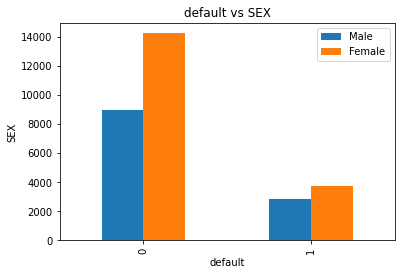

In [7]:
pd.crosstab(df['default payment next month'],df['SEX']).plot(kind='bar')
plt.title('default vs SEX')
plt.xlabel('default')
plt.ylabel('SEX')
plt.legend(['Male', 'Female'])
plt.show()

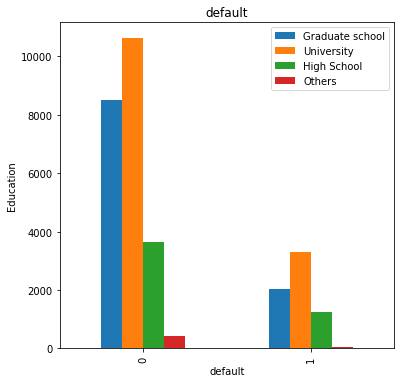

In [8]:
pd.crosstab(df['default payment next month'],df['EDUCATION']).plot(kind='bar', figsize=(6,6))
plt.title('default')
plt.xlabel('default')
plt.ylabel('Education')
plt.legend(['Graduate school','University','High School', 'Others', 'Unknown', 'Unknown'])
plt.show()

### Adding some new features

In [9]:
total_bill_amt = df.loc[: , ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)
df['total_bill_amt'] = total_bill_amt

total_pay_amt = df.loc[:,['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1)
df['total_pay_amt'] = total_pay_amt

total_default_amt = df['total_bill_amt']  - df['total_pay_amt']
df['total_default_amt'] = total_default_amt



In [7]:
def age_filter(age, threshold):
    if age>threshold:
        return 1
    else:
        return 0

In [8]:
df['age_more_30'] = df.AGE.apply(lambda x: age_filter(x, 30))
df['age_more_40'] = df.AGE.apply(lambda x: age_filter(x, 40))
df['age_more_50'] = df.AGE.apply(lambda x: age_filter(x, 50))

/Volumes/T7/ML/minicoda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Volumes/T7/ML/minicoda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Volumes/T7/ML/minicoda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

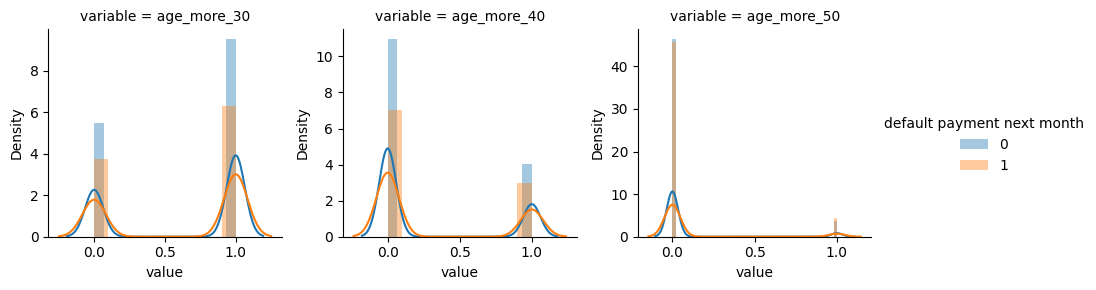

In [9]:
f = pd.melt( df, id_vars=output, value_vars=['age_more_30', 'age_more_40', 'age_more_50'])
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=3, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

In [10]:
## Age less or more than 50 has somewhat equal number of deafulter and non defaulter as blue and orange bar are overlapping
## Other age also have same percentage of people defeaulting and no defeaulting on both greater and less than side, not use fule columns

df.drop(columns = ['age_more_30', 'age_more_40', 'age_more_50'], inplace=True)

In [11]:
df.EDUCATION.unique()

array([2, 1, 3, 4])

### CREATING DUMMING FOR CATEGORICAL VARIABLES

In [10]:
## Since SEX has two values 1 & 2, which will lead to show hat one of the sex if greater than other in numerical analysis, this needs to be treated
SX=pd.get_dummies(df["SEX"])
df.drop(columns=['SEX'], inplace=True)
df=pd.concat([df,SX],axis=1)
df.rename(columns={1: "SEX"},inplace=True)
df.drop(columns = [2],inplace=True)

In [11]:
MRG=pd.get_dummies(df["MARRIAGE"])
df.drop(columns=['MARRIAGE'], inplace=True)
MRG.rename(columns={0:"MRG0",1:"MRG1",2:"MRG2"},inplace=True)
MRG.drop(columns=[3], inplace=True)
df=pd.concat([df,MRG],axis=1)

In [67]:
df.columns

Index(['ID', 'LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'SEX', 'MRG0', 'MRG1', 'MRG2'],
      dtype='object')

### SKEWNESS ANALYSIS FOR NUMERICAL FEAUTRES

/Volumes/T7/ML/minicoda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

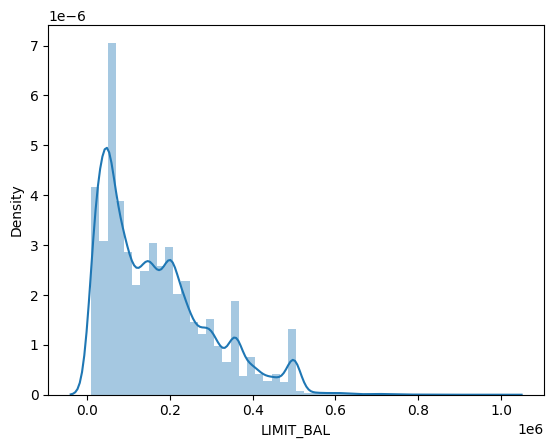

In [12]:
sns.distplot(df.LIMIT_BAL)

/Volumes/T7/ML/minicoda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

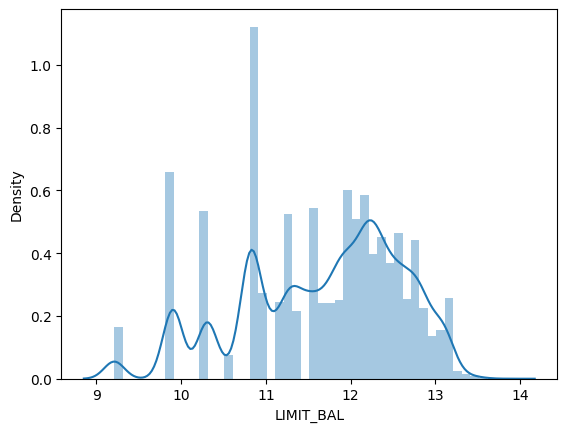

In [13]:
sns.distplot(np.log(df.LIMIT_BAL))

### Log transforamtion help in treating the skewedness in the data

In [12]:
df['log_limit_bal'] = np.log(df.LIMIT_BAL)

In [13]:
col_list =  df.columns

In [14]:

for pay_amt in range(1,7):
    df[ "log_PAY_AMT" + str( pay_amt )]  = df["PAY_AMT"  + str( pay_amt )].apply( lambda x: np.log1p(x) if (x>0) else 0 )

for bill_amt in range(1,7):
    df[ "log_BILL_AMT" + str( bill_amt )] = df["BILL_AMT" + str( bill_amt )].apply( lambda x: np.log1p(x) if (x>0) else 0 )

<AxesSubplot:xlabel='log_BILL_AMT1', ylabel='Density'>

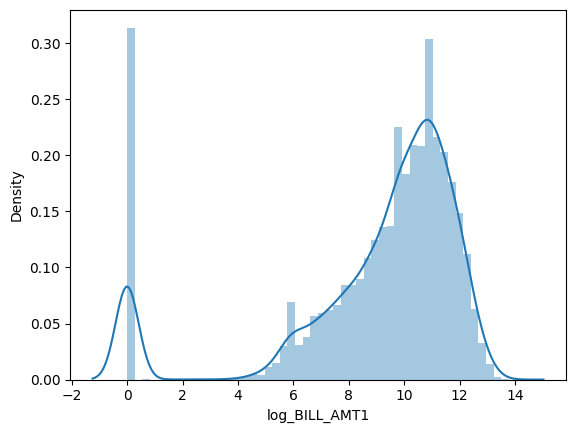

In [15]:
sns.distplot(df.log_BILL_AMT1)

<AxesSubplot:>

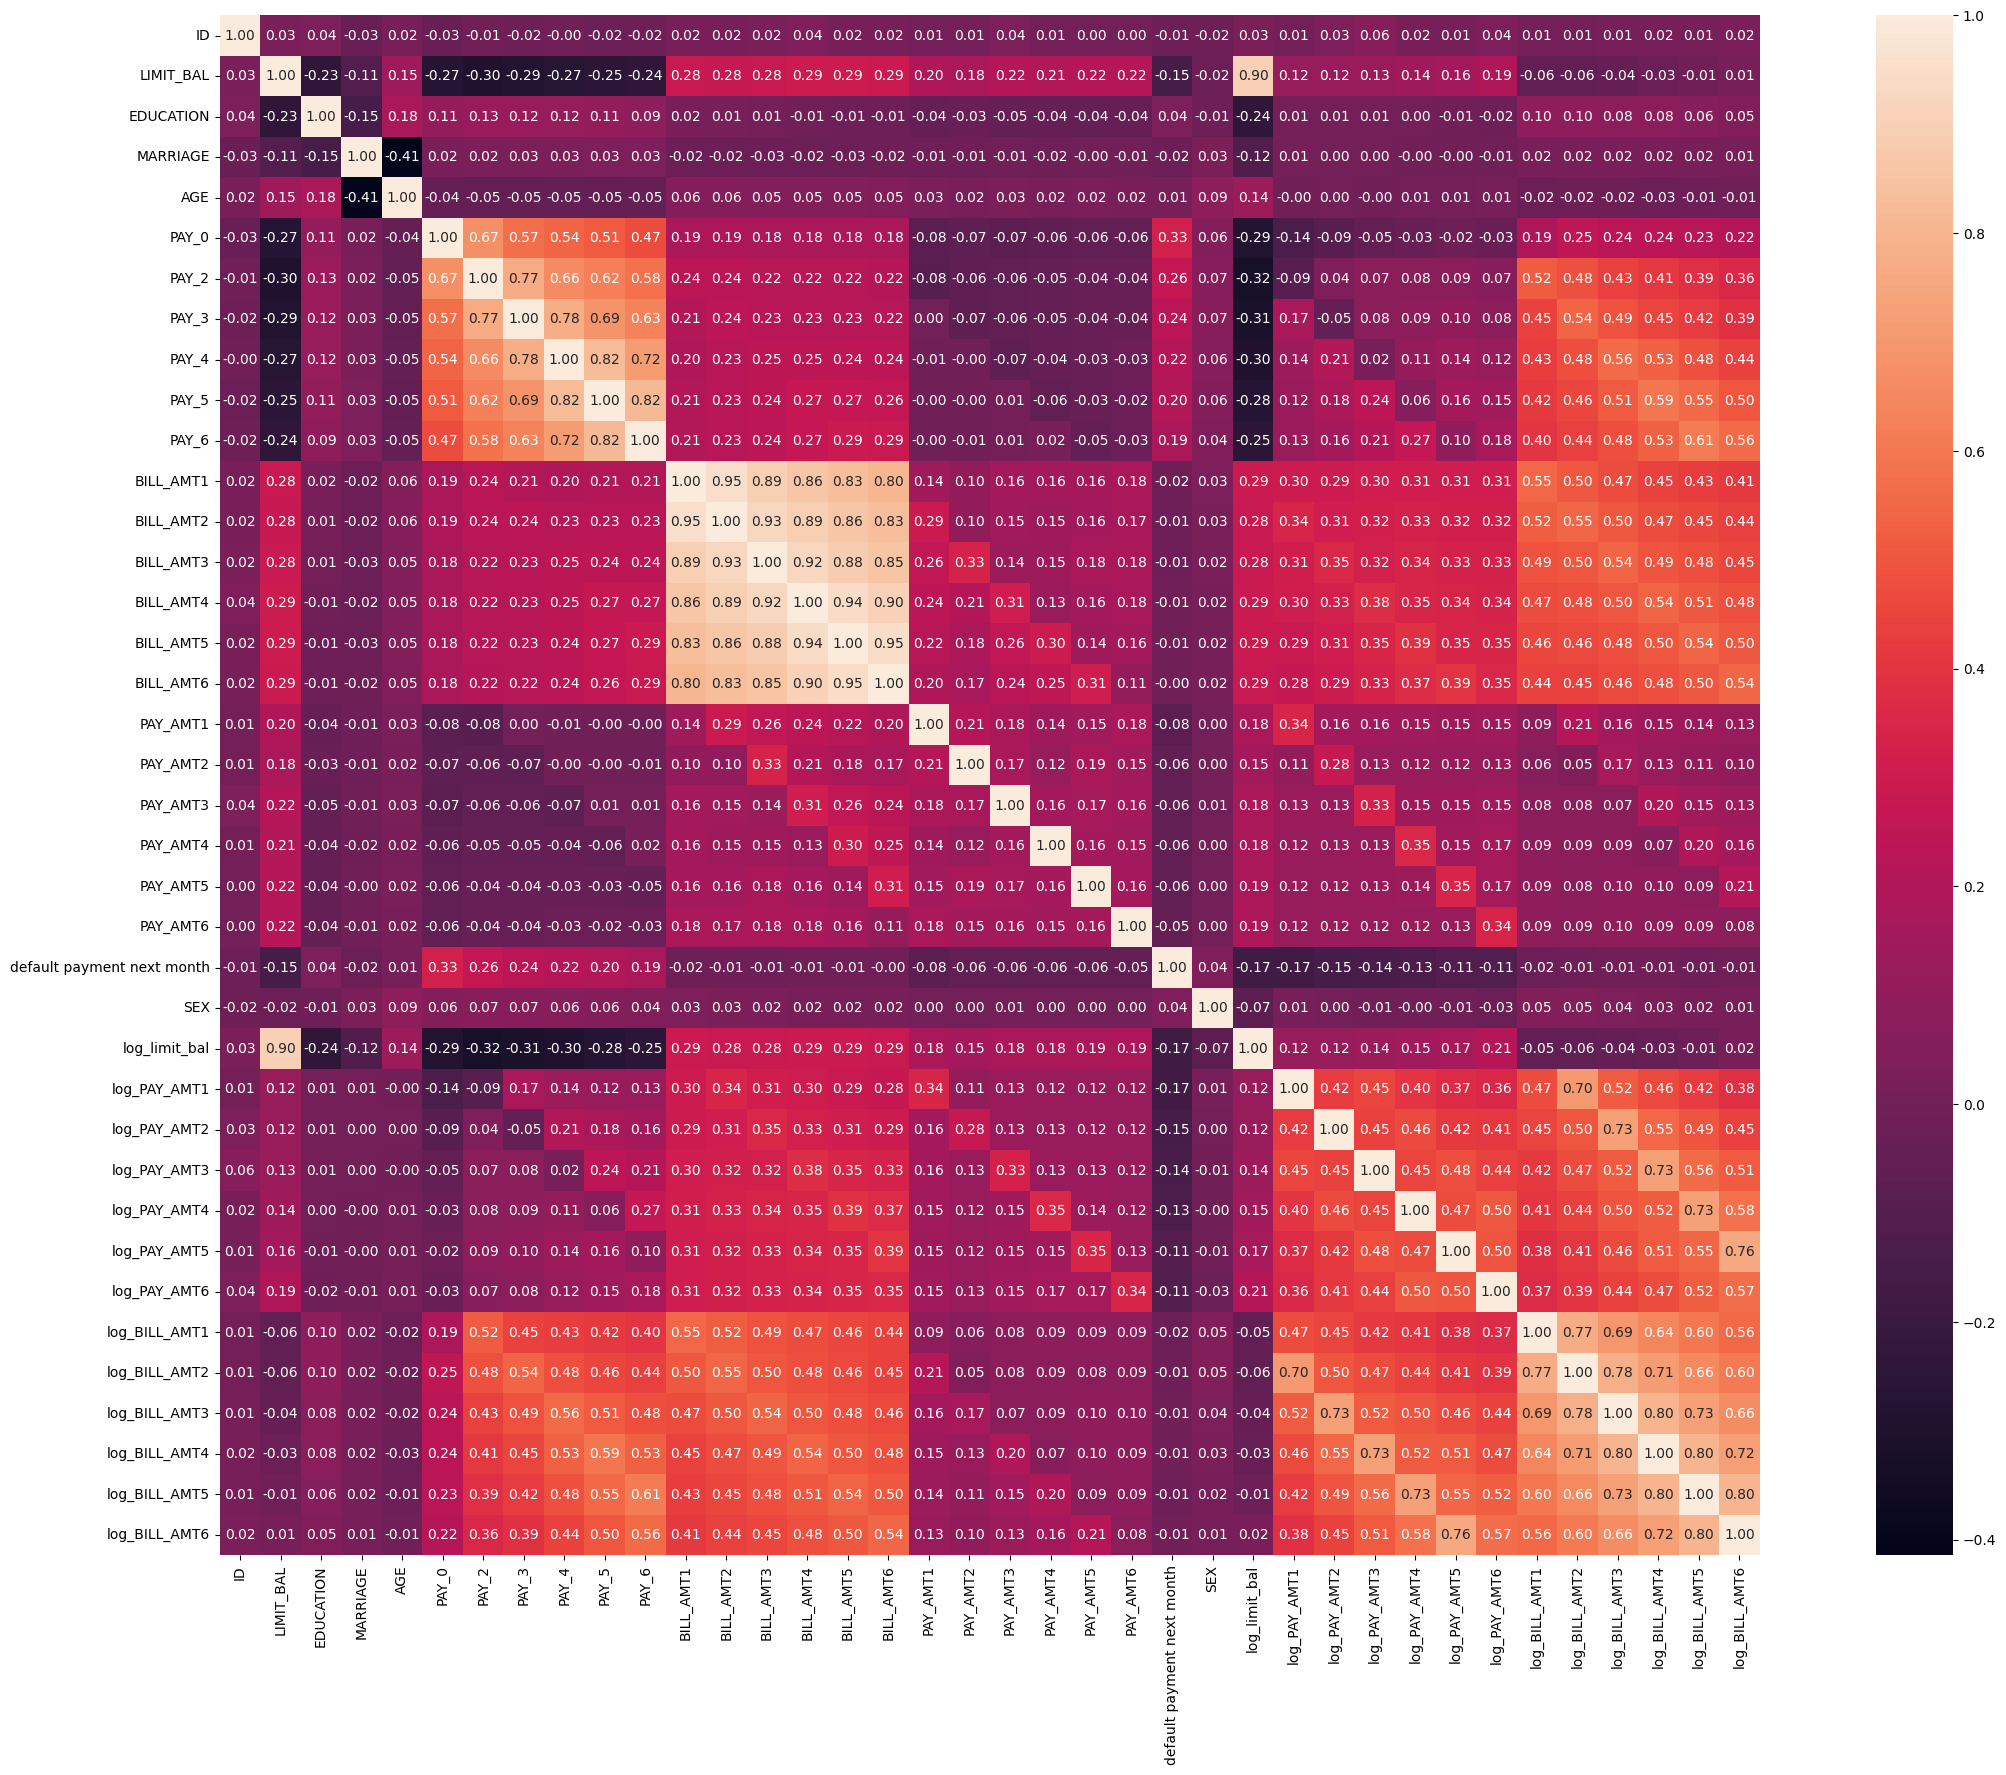

In [58]:
corr = df.corr()
plt.subplots(figsize=(30,20))
sns.heatmap( corr, square=True, annot=True, fmt=".2f" ) 

In [16]:
numerical_features = df.columns.difference(['AGE_BIN', 'default payment next month'])
target = 'default payment next month'

In [18]:
df.columns

Index(['ID', 'LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'AGE_BIN', 'total_bill_amt',
       'total_pay_amt', 'total_default_amt', 'SEX', 'MRG0', 'MRG1', 'MRG2',
       'log_limit_bal', 'log_PAY_AMT1', 'log_PAY_AMT2', 'log_PAY_AMT3',
       'log_PAY_AMT4', 'log_PAY_AMT5', 'log_PAY_AMT6', 'log_BILL_AMT1',
       'log_BILL_AMT2', 'log_BILL_AMT3', 'log_BILL_AMT4', 'log_BILL_AMT5',
       'log_BILL_AMT6'],
      dtype='object')

In [19]:
numerical_features_logged = ['EDUCATION', 'AGE', 
                            'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                            'SEX', 'MRG0', 'MRG1', 'MRG2',
                            'log_PAY_AMT1', 'log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4',
                            'log_PAY_AMT5', 'log_PAY_AMT6', 'log_BILL_AMT1', 'log_BILL_AMT2',
                            'log_BILL_AMT3', 'log_BILL_AMT4', 'log_BILL_AMT5', 'log_BILL_AMT6'
                            'total_bill_amt', 'total_default_amt', 'total_pay_amt']

numerical_features_not_logged = ['LIMIT_BAL', 'EDUCATION', 'AGE', 
                                   'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                                   'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                                   'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                                   'SEX', 'MRG0', 'MRG1', 'MRG2',
                                   'total_bill_amt', 'total_pay_amt', 'total_default_amt']

In [20]:
features = df[numerical_features_not_logged]
target_df = df[target]

## Class Imbalance in target variable

In [21]:
target_df.value_counts()

0    23214
1     6601
Name: default payment next month, dtype: int64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(features,target_df,test_size = 0.25)

print(f"x train shape :{x_train.shape}")
print(f"y train shape : {y_train.shape}")
print(f"x test shape : {x_test.shape}")
print(f"y test shape : {y_test.shape}")

x train shape :(22361, 28)
y train shape : (22361,)
x test shape : (7454, 28)
y test shape : (7454,)


In [41]:
train_count = Counter(y_train)
print(f"sample count rain : {train_count}")

test_count = Counter(y_test)
print(f"sample count test : {test_count}")

sample count rain : Counter({0: 17364, 1: 4997})
sample count test : Counter({0: 5850, 1: 1604})


#### FEATURE SELECTION FOR LOGISTIC REGRESSIOn

In [51]:
from sklearn.model_selection import GridSearchCV
# Perform GridSearchCV to tune best-fit LR model
param = {'C': [10**-2,10**-1,10**0]}

scX = StandardScaler()
x_train_scaled = scX.fit_transform( x_train )
x_test_scaled = scX.transform( x_test )

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(x_train_scaled, y_train)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(x_train_scaled, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [52]:
coef = model.coef_[0]
imp_features = pd.Series(x_train.columns)[list(coef!=0)]
# X_train = x_train_scaled[imp_features]
# X_test = x_train_scaled[imp_features]
imp_features

0         LIMIT_BAL
1         EDUCATION
2               AGE
3             PAY_0
4             PAY_2
5             PAY_3
6             PAY_4
7             PAY_5
8             PAY_6
9         BILL_AMT1
10        BILL_AMT2
11        BILL_AMT3
12        BILL_AMT4
13        BILL_AMT5
15         PAY_AMT1
16         PAY_AMT2
17         PAY_AMT3
18         PAY_AMT4
20         PAY_AMT6
21              SEX
22             MRG0
23             MRG1
24             MRG2
26    total_pay_amt
dtype: object

In [53]:
coef

array([-0.10019131, -0.08166443,  0.07876616,  0.66242084,  0.10635783,
        0.06197503,  0.0508347 ,  0.00712962,  0.03885046, -0.46769809,
        0.26724137,  0.05601281,  0.01112734,  0.02894989,  0.        ,
       -0.18888842, -0.07812925, -0.02814571, -0.02221582,  0.        ,
        0.03111065,  0.05117519, -0.06008897,  0.0365733 , -0.06243867,
        0.        , -0.19633745,  0.        ])

In [54]:
x_train = x_train[imp_features]
x_test = x_test[imp_features]

In [58]:
def plot_roc(y_test, y_pred):
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

In [55]:
lr_model = LogisticRegression() 

scX = StandardScaler()
x_train_scaled = scX.fit_transform( x_train )
x_test_scaled = scX.transform( x_test )

lr_model.fit(x_train_scaled,y_train)

y_pred = lr_model.predict(x_test_scaled) 

print(f"F1 score:{f1_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

F1 score:0.3471768548763416
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5850
           1       0.69      0.23      0.35      1604

    accuracy                           0.81      7454
   macro avg       0.76      0.60      0.62      7454
weighted avg       0.79      0.81      0.77      7454



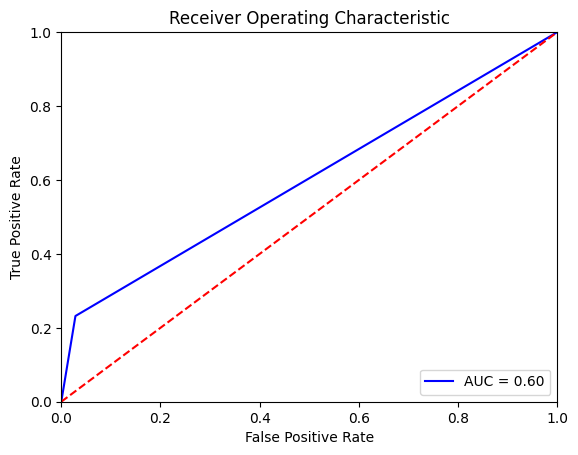

In [60]:
plot_roc(y_test, y_pred)

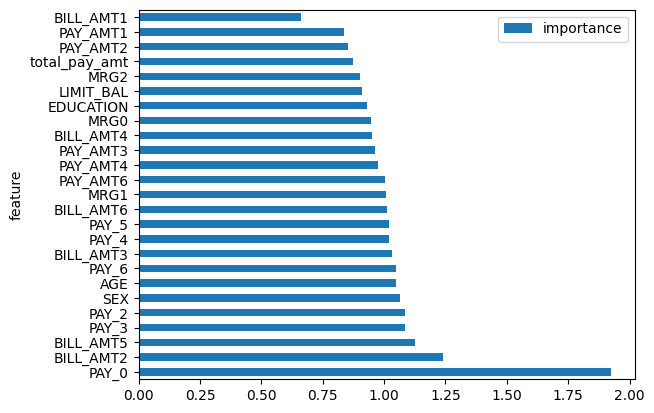

In [30]:
import math
w = lr_model.coef_[0]
feature_importance = pd.DataFrame(x_train.columns, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [61]:
print(confusion_matrix(y_test, y_pred))

[[5683  167]
 [1232  372]]


In [62]:
y_test[y_test == y_pred].value_counts()

0    5683
1     372
Name: default payment next month, dtype: int64

In [63]:
y_test[y_test != y_pred].value_counts()

1    1232
0     167
Name: default payment next month, dtype: int64

In [64]:
precision_score(y_test,y_pred)

0.6901669758812616

### CART ALGORITHM

<AxesSubplot:>

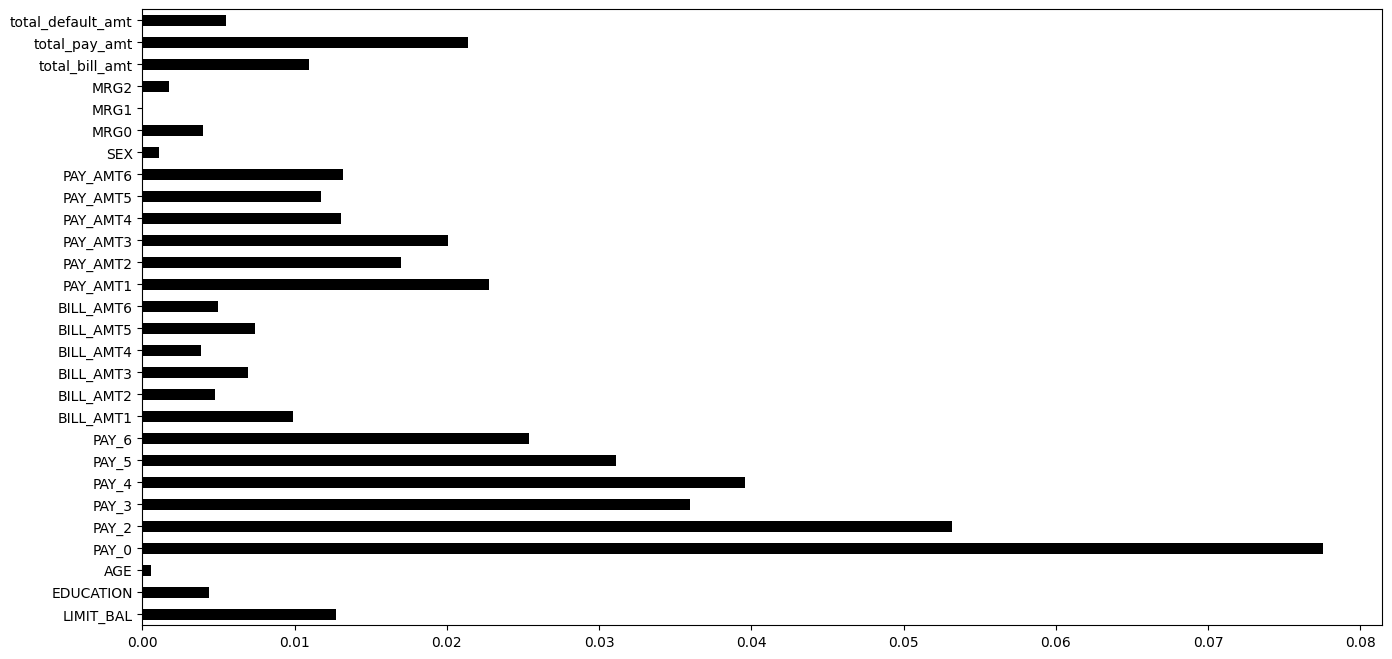

In [65]:
# Information Gain
importances = mutual_info_classif(features,target_df)
feat_importance = pd.Series(importances,numerical_features_not_logged)

feat_importance.plot(kind = 'barh' , color = 'black', figsize=(16,8))

In [66]:
tree_features_df = features.drop(['AGE','MRG1','MRG2','SEX', 'EDUCATION', 'total_default_amt', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT3', 'BILL_AMT6'] , axis = 1)

In [67]:
x_train,x_test,y_train,y_test = train_test_split(tree_features_df,target_df,train_size = 0.75)

In [68]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

y_pred_tree = tree_model.predict(x_test)

print(f"F1 score:{f1_score(y_test,y_pred_tree)}")
print(classification_report(y_test,y_pred_tree))

F1 score:0.40323045860974904
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      5739
           1       0.40      0.41      0.40      1715

    accuracy                           0.72      7454
   macro avg       0.61      0.61      0.61      7454
weighted avg       0.72      0.72      0.72      7454



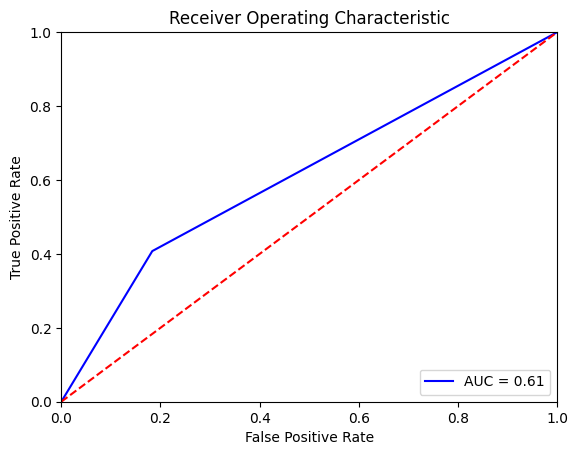

In [69]:
plot_roc(y_test, y_pred_tree)

In [70]:
classifier = RandomForestClassifier()
classifier.fit( x_train, y_train )
y_pred = classifier.predict( x_test )

print(f"F1 score:{f1_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

F1 score:0.4587495375508694
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5739
           1       0.63      0.36      0.46      1715

    accuracy                           0.80      7454
   macro avg       0.73      0.65      0.67      7454
weighted avg       0.78      0.80      0.78      7454

